In [110]:
import pandas as pd
import seaborn as sb

In [148]:
def sit_data(acc,gyr):    
    ACC = pd.read_csv(acc)
    GYR = pd.read_csv(gyr)
    ACC = ACC.rename(columns={"x":"accx","y":"accy","z":"accz"})
    GYR = GYR.rename(columns={"x":"gyrx","y":"gyry","z":"gyrz"})
    temptime = []
    for i in range(len(ACC)):
        temptime.append(int(ACC["time"][i]/10))
    ACC['UpdatedTime'] = temptime
    ACC = ACC.drop(columns=["time"])
    temptime = []
    for i in range(len(GYR)):
        temptime.append(int(GYR["time"][i]/10))
    GYR['UpdatedTime'] = temptime
    GYR = GYR.drop(columns=["time"])
    return pd.merge(ACC, GYR, on='UpdatedTime')

In [150]:
df1 = sit_data("ACC1.csv","GYR1.csv")

In [151]:
df2 = sit_data("ACC2.csv","GYR2.csv")

In [152]:
df3 = sit_data("ACC3.csv","GYR3.csv")

In [153]:
df4 = sit_data("ACC4.csv","GYR4.csv")

In [154]:
df5 = sit_data("ACC5.csv","GYR5.csv")

In [155]:
SITDF = pd.concat([df1,df2,df3,df4,df5,df5])

In [156]:
SITDF

,accz,accy,accx,UpdatedTime,gyrz,gyry,gyrx
0,0.971081,-0.110848,-0.048335,166982389308,0.009900,-0.014162,0.010038
1,0.970561,-0.105434,-0.044251,166982389313,0.009900,0.002887,0.012100
2,0.972809,-0.104516,-0.044465,166982389318,0.014162,0.008250,0.004675
3,0.970561,-0.107682,-0.049558,166982389324,0.013200,0.005087,0.006875
4,0.974752,-0.113081,-0.051501,166982389329,0.005637,0.011412,0.005775
...,...,...,...,...,...,...,...
1250,0.983516,-0.107483,-0.151627,166983801277,0.003437,-0.037538,-0.006050
1251,0.948137,-0.099422,-0.159489,166983801282,0.000137,-0.003437,-0.011412
1252,0.960772,-0.104011,-0.155512,166983801288,-0.003025,0.011412,-0.000825
1253,0.960068,-0.106260,-0.158663,166983801293,-0.004125,-0.007700,-0.003987


In [157]:
SITDF.index = range(0,len(SITDF),1)

In [158]:
plotsitdf =  SITDF.iloc[0:1000,:]

<AxesSubplot:xlabel='UpdatedTime', ylabel='accx'>

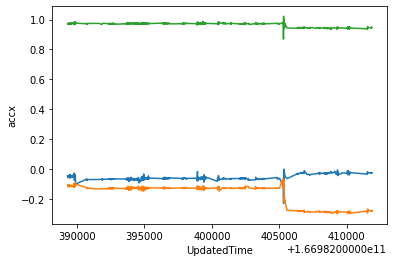

In [159]:
sb.lineplot(y = 'accx', x = 'UpdatedTime', data = plotsitdf)
sb.lineplot(y = 'accy', x = 'UpdatedTime', data = plotsitdf)
sb.lineplot(y = 'accz', x = 'UpdatedTime', data = plotsitdf)

<AxesSubplot:xlabel='UpdatedTime', ylabel='gyrx'>

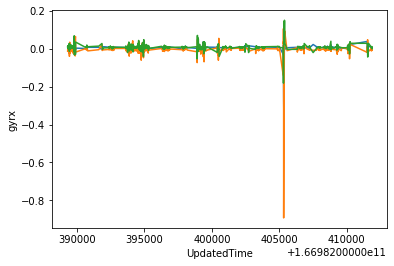

In [160]:
sb.lineplot(y = 'gyrx', x = 'UpdatedTime', data = plotsitdf)
sb.lineplot(y = 'gyry', x = 'UpdatedTime', data = plotsitdf)
sb.lineplot(y = 'gyrz', x = 'UpdatedTime', data = plotsitdf)

In [161]:
Label = []
for i in range(len(SITDF)):
    Label.append("sitting")

In [162]:
SITDF["Label"] = Label

In [165]:
SITDF.to_csv("SIT.csv",index=False)